In [ ]:
#MNIST Digits

In [44]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [45]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

len(x_train)
# 60000

len(x_test)
# 10000

# Finding the shape of individual sample
x_train[0].shape
# (28, 28)

11493376/11490434 [==============================] - 2s 0us/step


(28, 28)

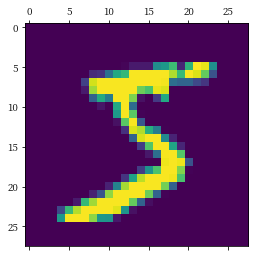

In [47]:
plt.matshow(x_train[0])

In [48]:
x_train.shape

(60000, 28, 28)

In [49]:
# Scale the data so that the values are from 0 - 1
x_train = x_train / 255
x_test = x_test / 255

In [50]:
# Flattening the train and test data
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [51]:
x_train_flattened.shape

(60000, 784)

In [52]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4843 - accuracy: 0.8793
Epoch 2/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3055 - accuracy: 0.9163
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2851 - accuracy: 0.9204
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2748 - accuracy: 0.9238
Epoch 5/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2682 - accuracy: 0.9264


In [53]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.evaluate(x_test_flattened, y_test)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.2662 - accuracy: 0.9271


[0.2662274599224329, 0.9271]

Text(69.3594,0.5,'Truth')

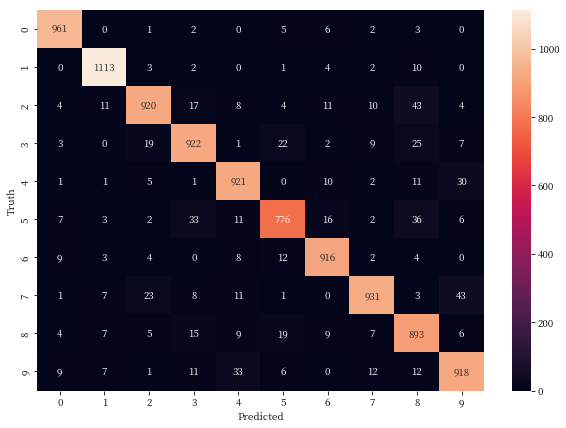

In [59]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
#Adding one more layer

In [61]:
# Sequential create a stack of layers
# Create a hidden layer with 100 neurons and relu activation
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2965 - accuracy: 0.9179
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1391 - accuracy: 0.9594
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1015 - accuracy: 0.9690
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0787 - accuracy: 0.9767
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0622 - accuracy: 0.9811


In [62]:
model.evaluate(x_test_flattened, y_test)

10000/10000 [==============================] - 1s 72us/sample - loss: 0.0955 - accuracy: 0.9723


[0.09548745548664592, 0.9723]

In [69]:
#Increase in accuracy from 92 to 97

Text(69.3594,0.5,'Truth')

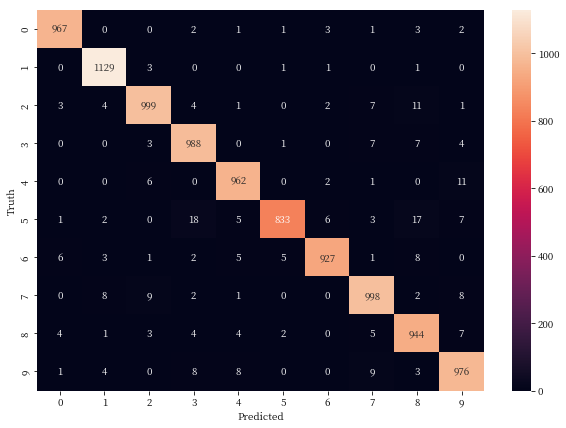

In [63]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [74]:
#Improved CNN

> 98.550
> 98.592
> 98.692
> 98.900
> 98.867


/home/admin/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


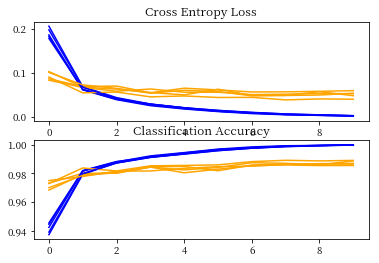

Accuracy: mean=98.720 std=0.141, n=5


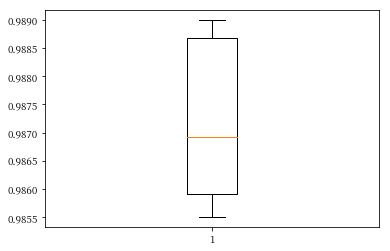

In [75]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

In [78]:
#increase to 99%